# Neural Network Image Classification with Keras and the MNIST Dataset

In this post we'll use Keras and implement the Hello, World of machine learning, predict which number is in an image using the MNIST database of handwritten digits, and achieve 99% classification accuracy.

Much of this is inspired by the book Deep Learning with Python by François Chollet. I highly recommend reading the book if you would like to dig deeper or learn more.
https://www.manning.com/books/deep-learning-with-python

In [1]:
%matplotlib inline

from keras import models, layers
from keras.datasets import mnist
from keras.utils import to_categorical
import matplotlib.pyplot as plt
import numpy as np

Since working with the MNIST digits is so common, Keras provides a function to load the data.

You can see a full list of datasets Keras has packaged up here https://keras.io/datasets/

Let's load the data.

In [2]:
(train_images, train_labels), (test_images, test_labels) = mnist.load_data()

11493376/11490434 [==============================] - 14s 1us/step


The training set consists of 60,000 28x28 pixel images, and the test set 10,000.

In [3]:
train_images.shape, test_images.shape

((60000, 28, 28), (10000, 28, 28))

Lets look at the first ten training images. They are each 28x28 grayscale images with one color value between 0 and 255.

[<AxesSubplot:> <AxesSubplot:> <AxesSubplot:> <AxesSubplot:>
 <AxesSubplot:> <AxesSubplot:> <AxesSubplot:> <AxesSubplot:>
 <AxesSubplot:> <AxesSubplot:>]


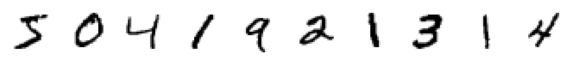

In [4]:
_, ax = plt.subplots(1, 10, figsize=(10,10))
print(ax)
for i in range(0, 10):
    ax[i].axis('off')
    ax[i].imshow(train_images[i], cmap=plt.cm.binary)

And the labels representing which class the image represents.

In [5]:
train_labels[0:10]

array([5, 0, 4, 1, 9, 2, 1, 3, 1, 4], dtype=uint8)

### Build the neural network

Now build the neural network. We'll be using a number of convolutional layers. Note that we only have to specify the input shape in the first layer. The last layer provides the output. It has 10 units (one for each digit 0 to 9) and uses a softmax activation to map the output of a network to a probability distribution over the predicted output classes.

https://en.wikipedia.org/wiki/Convolutional_neural_network

In [25]:
model = models.Sequential()
model.add(layers.Conv2D(16, (3, 3), input_shape=(28, 28, 1), padding='same'))
model.add(layers.advanced_activations.PReLU())
model.add(layers.Conv2D(16, (3, 3), padding='same'))
model.add(layers.advanced_activations.PReLU())
model.add(layers.Conv2D(32, (3, 3), strides=(2, 2), padding='same'))
model.add(layers.advanced_activations.PReLU())
model.add(layers.Conv2D(32, (3, 3), padding='same'))
model.add(layers.advanced_activations.PReLU())
model.add(layers.Conv2D(64, (3, 3), strides=(2, 2), padding='same'))
model.add(layers.advanced_activations.PReLU())
model.add(layers.Conv2D(64, (3, 3), padding='same'))
model.add(layers.advanced_activations.PReLU())
model.add(layers.Conv2D(64, (3, 3), strides=(2, 2), padding='same'))
model.add(layers.Conv2D(64, (3, 3), padding='same'))
model.add(layers.advanced_activations.PReLU())
model.add(layers.Conv2D(64, (3, 3), strides=(2, 2), padding='same'))
model.add(layers.advanced_activations.PReLU())
model.add(layers.Flatten())
model.add(layers.Dense(64))
model.add(layers.advanced_activations.PReLU())
model.add(layers.Dense(10, activation='softmax'))

model.compile(optimizer='rmsprop', loss='categorical_crossentropy', metrics=['accuracy'])

One way to see what the network looks like is to use the summary() function:

In [26]:
model.summary()

Model: "sequential_5"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d_35 (Conv2D)           (None, 28, 28, 16)        160       
_________________________________________________________________
p_re_lu_42 (PReLU)           (None, 28, 28, 16)        12544     
_________________________________________________________________
conv2d_36 (Conv2D)           (None, 28, 28, 32)        4640      
_________________________________________________________________
p_re_lu_43 (PReLU)           (None, 28, 28, 32)        25088     
_________________________________________________________________
conv2d_37 (Conv2D)           (None, 14, 14, 64)        18496     
_________________________________________________________________
p_re_lu_44 (PReLU)           (None, 14, 14, 64)        12544     
_________________________________________________________________
conv2d_38 (Conv2D)           (None, 14, 14, 64)       

In [27]:
(train_images, train_labels), (test_images, test_labels) = mnist.load_data()

We need to do some preprocessing of the images. We'll also use the first 50,000 training images for training, and the remaining 10,000 training examples for cross validation.

In [28]:
train_images = train_images.reshape((60000, 28, 28, 1))
train_images= train_images.astype('float32') / 255 # rescale pixel values from range [0, 255] to [0, 1]

test_images = test_images.reshape((10000, 28, 28, 1))
test_images= test_images.astype('float32') / 255

train_labels = to_categorical(train_labels)
test_labels = to_categorical(test_labels)

validation_images = train_images[50000:]
validation_labels = train_labels[50000:]

train_images = train_images[:50000]
train_labels = train_labels[:50000]

In [29]:
history = model.fit(train_images, train_labels, epochs=5, batch_size=64, validation_data=(validation_images, validation_labels))

Epoch 1/5
782/782 [==============================] - 105s 135ms/step - loss: 0.2056 - accuracy: 0.9352 - val_loss: 0.1211 - val_accuracy: 0.9664
Epoch 2/5
782/782 [==============================] - 108s 138ms/step - loss: 0.0615 - accuracy: 0.9816 - val_loss: 0.0441 - val_accuracy: 0.9878
Epoch 3/5
782/782 [==============================] - 104s 133ms/step - loss: 0.0436 - accuracy: 0.9874 - val_loss: 0.0467 - val_accuracy: 0.9891
Epoch 4/5
782/782 [==============================] - 104s 133ms/step - loss: 0.0355 - accuracy: 0.9898 - val_loss: 0.0391 - val_accuracy: 0.9894
Epoch 5/5
782/782 [==============================] - 105s 135ms/step - loss: 0.0290 - accuracy: 0.9917 - val_loss: 0.0570 - val_accuracy: 0.9887


In [30]:
test_loss, test_acc = model.evaluate(test_images, test_labels)
print('Accuracy:', test_acc)
print('Loss: ', test_loss)

313/313 [==============================] - 4s 13ms/step - loss: 0.0376 - accuracy: 0.9908
Accuracy: 0.9908000230789185
Loss:  0.037601158022880554


Looks pretty good we're seeing ~99% accuracy on the test set.

## Visualize training

Now lets create a function that lets us graph the accuracy and loss values during training.

In [ ]:
def plot_accuracy_and_loss(history):
    acc = history.history['acc']
    val_acc = history.history['val_acc']
    loss = history.history['loss']
    val_loss = history.history['val_loss']

    epochs = range(1, len(acc) + 1)

    plt.plot(epochs, acc, 'bo', label='Training acc')
    plt.plot(epochs, val_acc, 'b', label='Validation acc')
    plt.title('Training and validation accuracy')
    plt.legend()
    plt.show()

    plt.plot(epochs, loss, 'bo', label='Training loss')
    plt.plot(epochs, val_loss, 'b', label='Validation loss')
    plt.title('Training and validation loss')
    plt.legend()
    plt.show()


In [ ]:
plot_accuracy_and_loss(history)

The above looks pretty good, we appear to be starting to overfit the data as we get further in, but training and validation sets are pretty close to each other.

Now lets look at a prediction, first we'll generate predictions for the test set.

In [ ]:
preds = model.predict(test_images)

We'll use the network to try to figure out what the first digit in the test set is. If we manually look, it appears to be a 7.

In [ ]:
# reload the test images so it will be in a format imshow() will understand
(_, _), (test_images, _) = mnist.load_data()

plt.imshow(test_images[0], cmap=plt.cm.binary)

Since the output of the network was a layer with 10 units and a softmax activation, we will get an array of length 10 with a prediction for each potential number. Here you can see that the network is 99.9% certain it is a seven.

In [ ]:
print(preds[0])

We can also find the class with the highest prediction score with a numpy function:

In [ ]:
np.argmax(preds[0])

The next step would be to retrain the model with all 60,000 training examples (remember that in the model above we trained on 50,000 examples and validated on the remaining 10,000). I'll leave that as an exercise to the reader.